### MTH 610 Model Constrained Optimization 2 (Homework 2)

#### Problem Setup

This assignment investigates the ability of the observation sensitivity apporahc to provide an apriori estimate to the impact of data removal in a model-constrained optimization problem. The setup is based on the tools developed in the previous homework (Homework_4) assignment as follows. 

Consider the boundary value problem (BVP) for a function $x:[0,1] \to \mathbb{R}$,
$$
\begin{cases}
-x''(t)+x^3(t)=u\\
x(0)=0, \quad x(1)=0
\end{cases}
\tag{1}
$$
where $u\in\mathbb{R}$ is a constant scalar time-independent parameter.

A discrete version to the original model BVP is obtained by considering a uniform partition of the interval $[0,1]$ with nodes $\{t_i:i=0:n+1\}$ at an increment $h=\frac{1}{n+1}$,
$$
0=t_0<t_1<\dots<t_n<t_{n+1}=1, \quad t_i=i*h \textrm{ for } i=0:n+1
$$
and an approximation for the second order derivative using a finite difference formula is 
$$
x''(t_i)\approx\frac{x(t_{i+1})-2x(t_i)+x(t_{i-1})}{h^2}, \quad i=1:n
$$

Therefore a discrete version of the BVP is given by,
$$
\begin{cases}
\frac{x_{i+1}-2x_i+x_{i-1}}{h^2} + x^3_{i} = u_i, \quad i=1:n\\
x_0=0, \quad x_{n+1}=0
\end{cases}
$$
where $x_i\approx x(t_i), \quad i=1:n$.

We can write this sytem of equations in matrix vector format,
$$
\mathbf{A}\mathbf{x}+\mathbf{G}(\mathbf{x})=u\mathbf{1_N}
\tag{2}
$$
where $u \in \mathbb{R}$ is a scalar, $\mathbf{1_N}\in \mathbb{R}^N$ is the constant vector of 1's, $\mathbf{A}\in \mathbb{R}^{N*N}$ is a scaled tridaigonal matrix with 2 on the main diagonal and -1 on the neighboring minor diagonals and the scaling constant is given by $\frac{1}{h^2}$, and $\mathbf{G}:\mathbb{R}^N\to\mathbb{R}^N$ is a vector valued funcition with $x_i^3$ in each component. 

Let $y\in \mathbb{R^2}$ denote the vector with components $y_i=\sin(t_i\pi), i =1:n$ and let $(\mathbf{x}^*, u^*)\in \mathbb{R}^n \times \mathbb{R}$ denote the solution to the optimization problem 
\begin{cases}
\min_{\mathbf{x},u} J(\mathbf{x},u) \ \dot{=} \ \frac{h}{2} ||\mathbf{x}-\mathbf{y}||^2=\frac{h}{2}\sum_{j=1}^n (\mathbf{x}_j-\mathbf{y}_j)^2 \\
\textrm{subject to constraints (2)}
\tag{3}
\end{cases}

Let $(\mathbf{x}_{[i]}^*, u_{[i]}^*)\in \mathbb{R}^n\times \mathbb{R}$ denote the solution to the optimization problem obtained by removing the componenet $y_i$ from the data vector $\mathbf{y}$ i.e., by performing an observing system experiment (OSE)
\begin{cases}
\min J_{[i]} \ \dot{=} \ \frac{h}{2}\sum_{j=1, j\ne i}^n(x_j-y_j)^2\\
\textrm{subject to constraints (2)}
\tag{4}
\end{cases}

To do just that we can introduce a new vector parameter $\mathbf{s}$ which can have the folowing forms $\mathbf{\bar{s}}=\mathbf{1}^n$, and $\mathbf{s}_{[i]}=\mathbf{1}^n$ with $0$ in the $i$-th component. 

In doing so, we can rewrite (4) in the following way:
\begin{cases}
\min_{\mathbf{x}, u} J_{[i]}(\mathbf{x}, u, \mathbf{s}) \ \dot{=} \ \frac{h}{2}\sum_{i=1}^n(x_i-y_i)^2s_i\\
\textrm{subject to constraints (2)}
\tag{5}
\end{cases}

Now we know from our previous work that this can be viewed in reduced cost function form given by:
\begin{cases}
\min_{u} \tilde{J}_{[i]}(u, \mathbf{s}) \ \dot{=} \ \frac{h}{2}\sum_{i=1}^n(x_i(u)-y_i)^2s_i\\
\textrm{subject to constraints (2)}
\tag{6}
\end{cases}

#### Part 1

A qanitity of interest (qoi, forcast aspect) is specified in terms of the state vector $\mathbf{x}$ as
$$
q(\mathbf{x})=\frac{1}{2}||\mathbf{x}||^2
\tag{7}
$$

The imact of the qoi produced by removing any individual data component $y_i, i=1:n$ from the optimization problem (3) is defined as
$$
\Delta q_i \ \dot{=} \ q(\mathbf{x}^*_{[i]}-q(\mathbf{x}^*))=\frac{1}{2}||\mathbf{x}_{[i]}^*||^2-\frac{1}{2}||\mathbf{x}^*||^2
\tag{8}
$$

For each data component $y_i, i=1:n$, and exact evlautaion to (7) may be obtained by performing the coresponding OSE (4),(5). The OSE apporach requires solving an additional optimization problem for each data component and in practice, it may become computationally prohibitive if the dimension of the data vector is large. 

Now we note that
$$
q(\mathbf{x})=q(\mathbf{x}(u(\mathbf{s})))=\tilde{q}(\mathbf{s})
\tag{9}
$$
Furthermore, $q(\mathbf{x}_{[i]}^*)=\tilde{q}(\mathbf{s_{[i]}})$ and $q(\mathbf{x}^*)=\tilde{q}(\mathbf{\bar{s}})$

Evaluation of the forecase sensitivity to observations (FSO) vector
$$
\nabla_\mathbf{s}q(\mathbf{x}^*)
\tag{10}
$$
in the status quo configuration (3) (when $\mathbf{s}=\mathbf{\bar{s}}$) provides a computationally efficient appraoch (all at once) to obtain apriori a first-order approximation to the impact of removing any individual data component,
$$
q(\mathbf{x}_{[i]}^*)-q(\mathbf{x}^*)=\tilde{q}(\mathbf{s}_{[i]})-\tilde{q}(\mathbf{\bar{s}})\approx \delta q_i \ \dot{=} \ (\mathbf{s}_{i} -\mathbf{\bar{s}})^T\nabla_s \tilde{q}(\mathbf{\bar{s}}) = -[\nabla_s\tilde{q}(\mathbf{\bar{s}})]_{i}
\tag{11}
$$
(by first order Taylor expansion around $\mathbf{\bar{s}}$

Therefore we need to find $[\nabla_s\tilde{q}(\mathbf{\bar{s}})]$.

In general we know 
\begin{align*}
\nabla_s\tilde{q}&=\nabla_s q(\mathbf{x}(u(\mathbf{s})))\\
&= \nabla_{\mathbf{s}}u \nabla_u \mathbf{x} \nabla_{\mathbf{x}} q\\
&= \nabla_{\mathbf{s}}u \biggl[ \frac{\partial \mathbf{x}}{\partial u}\biggr]^T\mathbf{x}\\
\end{align*}

Now, we will need to evaluate this in the reference system ($\mathbf{s}=\mathbf{\bar{s}}$) at optimality $(\mathbf{x}^*, u^*)$.
Therefore we need,
$$
[\nabla_{\mathbf{s}}\tilde{q}]_{\mathbf{\bar{s}}} = [\nabla_{\mathbf{s}}u]_{\mathbf{\bar{s}}}\biggl[ \frac{\partial \mathbf{x}}{\partial u}\biggr]_{\mathbf{x}^*, u^*}^T\mathbf{x}^*
\tag{12}
$$

Now we already know from our previous work that $\biggl[ \frac{\partial \mathbf{x}}{\partial u}\biggr]_{\mathbf{x}^*,u^*}^T$ can be found from the TLM and is given by 
$$
\biggl[ \frac{\partial \mathbf{x}}{\partial u}\biggr]_{\mathbf{x}^*, u^*}^T=[([\mathbf{A}]+[G_x])^{-1}\mathbf{1}^n]_{\mathbf{x}^*, u^*}^T \in \mathbb{R}^{1 \times n}\\
\implies \biggl[ \frac{\partial \mathbf{x}}{\partial u}\biggr]_{\mathbf{x}^*, u^*}=[([\mathbf{A}]+[G_x])^{-1}\mathbf{1}^n]_{\mathbf{x}^*, u^*} \in \mathbb{R}^{n}
\tag{13}
$$

Furthermore, we need to find $\nabla_{\mathbf{s}}u$ within the standard reference system ($\mathbf{s}=\mathbf{\bar{s}}$) at optimality $(\mathbf{x}^*, u^*)$.

Since we are going to evaluate (12) within the standard reference system ($\mathbf{s}=\mathbf{\bar{s}}$) at optimality $(\mathbf{x}^*, u^*)$ we are going to assume FONC and SONC hold:
$$
\nabla_u \tilde{J}(u^*, \mathbf{\bar{s}})  = 0
\tag{FONC}
$$

$$
\nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}}) \ge 0
\tag{SONC}
$$

Now, 
\begin{align*}
\nabla_u \tilde{J}(u^*, \mathbf{\bar{s}}) &= \nabla_u u \nabla_u \tilde{J}(u^*, \mathbf{\bar{s}}) \\
&= \nabla_u \tilde{J}(u^*, \mathbf{\bar{s}} )
\tag{14}
\end{align*}
Therfore,
\begin{align*}
\nabla_{su}\tilde{J}(u^*, \mathbf{\bar{s}} ) &= \nabla_{\mathbf{s}}u \nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})+\nabla_{\mathbf{s}}\mathbf{s} \nabla_{\mathbf{s}u}^2 \tilde{J}(u^*, \mathbf{\bar{s}})\\
&= \nabla_{\mathbf{s}}u \nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})+ \nabla_{\mathbf{s}u}^2 \tilde{J}(u^*, \mathbf{\bar{s}})
\tag{15}
\end{align*}

Now we know from the (FONC), at optimality we have
$$
\nabla_{su}\tilde{J}(u^*, \mathbf{\bar{s}} )=\nabla_{\mathbf{s}}u \nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})+ \nabla_{\mathbf{s}u}^2 \tilde{J}(u^*, \mathbf{\bar{s}})) =0\\
\implies [\nabla_{\mathbf{s}}u]_{\mathbf{\bar{s}}}=-[\nabla_{\mathbf{s}u}^2 \tilde{J}(u^*, \mathbf{\bar{s}})][\nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})]^{-1}
\tag{16}
$$

Now we can compute $[\nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})]^{-1}$ from our previous work. Therfore, we just need to figure out how to compute $\nabla_{\mathbf{s}u}^2 \tilde{J}(u^*, \mathbf{\bar{s}})$.

Element wise, we know from (16) that
\begin{align*}
\biggl[\frac{\partial u}{\partial s_i} \biggr]^T_{\mathbf{\bar{s}}} &= - [\nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})]^{-T}\biggl[\frac{\partial ^2 \tilde{J}(u^*, \mathbf{\bar{s}})}{\partial s_i \partial u} \biggr]^T \\
&= - [\nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})]^{-T}\biggl[h(x^*_i-y_i) \biggl[\frac{\partial x^*_i}{\partial u}\biggr]_{u^*} \biggr]^T
\end{align*}
Therefore we can see that,
$$
[\nabla_{\mathbf{s}}u]_{\mathbf{\bar{s}}}=-h(\mathbf{x}^*-\mathbf{y})\odot \biggl[\frac{\partial \mathbf{x}}{\partial u}\biggr]_{\mathbf{x}^*,u^*}[\nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})]^{-1} \in \mathbb{R}^n
\tag{17}
$$

Where the notation $\odot$ means element wise multiplication.

Therefore combining information from (17) into (12) within our reference system at optimality we have:
$$
[\nabla_{\mathbf{s}}\tilde{q}]_{\mathbf{\bar{s}}} = -h(\mathbf{x}^*-\mathbf{y})\odot \biggl[\frac{\partial \mathbf{x}}{\partial u}\biggr]_{\mathbf{x}^*,u^*}[\nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})]^{-1} \biggl[ \frac{\partial \mathbf{x}}{\partial u}\biggr]_{\mathbf{x}^*, u^*}^T\mathbf{x}^* \in \mathbb{R}^n
\tag{18}
$$

Finally, we are able to get a final expression for the apriori a first-order approximation to the impact of removing any individual data component given in (12),
\begin{align*} 
\tilde{q}(\mathbf{s}_{[i]}^*)-\tilde{q}(\mathbf{\bar{s}})\approx \delta q_i \ &\dot{=} \ (\mathbf{s}_{[i]})-\mathbf{\bar{s}})^T\nabla_s \tilde{q}(\mathbf{\bar{s}})\\
&= -[\nabla_s\tilde{q}(\mathbf{\bar{s}})]_{i}\\
&= \Biggl[h(\mathbf{x}^*-\mathbf{y})\odot \biggl[\frac{\partial \mathbf{x}}{\partial u}\biggr]_{\mathbf{x}^*,u^*}[\nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})]^{-1} \biggl[ \frac{\partial \mathbf{x}}{\partial u}\biggr]_{\mathbf{x}^*, u^*}^T\mathbf{x}^*\Biggr]_{i}
\tag{19}
\end{align*}

We will now provide the needed code to evaluate the sensitivity to the observation vector (10) and the observation impact estimates (12).

In [1]:
#Import needed packages

import matplotlib.pyplot as plt
import numpy as np
import scipy
import sympy
from scipy.optimize import fsolve
from numpy.linalg import inv

In [64]:
def homework5(uguess, step_size):
    # Define constants
    N=99
    h=1/(N+1)
    maxiter = 10000
    tol = 1e-8
    
    # Define A, the discrete Laplace matrix
    main_diag = 2 * np.eye(N)
    minor_diags = -1 * (np.eye(N, k=-1) + np.eye(N, k=1))
    A = 1/(h*h) * (main_diag + minor_diags)
    
    #################### Functions ######################

    # Define vector G(x), Jacobian G_x, Jacobian [G_xlamb]_x
    def G(x):
        return np.power(x,3)
    
    def G_x(x):
        diagonal = 3 * np.power(x, 2)
        return np.diag(diagonal)
    
    def G_xlamb_x(x, lamb):
        diagonal = 6 * x * lamb
        return np.diag(diagonal)
    
    ### Define model equations to be solved ###
    
    #TLM Model Equation
    def xequation(x, A, u):
        return A @ x + G(x) - u
    
    #FOA Model Equation
    def lambsolved(A, x, y, h, s):
        return h * inv((A + G_x(x))) @ np.multiply((x - y), s)
    
    def xisolved(A, x):
        return inv(A + G_x(x)) @ np.ones(N) 
    
    #SOA Model Equation
    def etasolved(A, x, xi, lamb):
        return inv(A + G_x(x)) @ (h * np.eye(N) - G_xlamb_x(x,lamb)) @ xi

    ### Solving model equations ###
    
    #Solve TLM
    def solvex(x_guess, A, smalluvect):
        resultx = fsolve(xequation, x_guess, args=(A, smalluvect), xtol=1e-10)
        solx = np.zeros(N+2)
        solx[1:-1] = resultx[:]
        return(resultx, solx)
    
    #Solve FOA
    def solvelamb(A, resultx, smallyvect, h, s):
        smalls = s[1:-1]
        resultlamb = lambsolved(A, resultx, smallyvect, h, smalls)
        sollamb = np.zeros(N+2)
        sollamb[1:-1] = resultlamb[:]
        return(resultlamb, sollamb)
    
    def solvexi(A, resultx):
        resultxi = xisolved(A, resultx)
        solxi = np.zeros(N+2)
        solxi[1:-1] = resultxi[:]
        return(resultxi)
    
    #Solve SOA
    def solveeta(A, resultx, resultxi, resultlamb):
        resulteta = etasolved(A, resultx, resultxi, resultlamb)
        soleta = np.zeros(N+2)
        soleta[1:-1] = resulteta[:]
        return(soleta)
    
    ### Define J'(u), J''(u) function value after you have x based on choice of u ###
    def jpufun(sollamb):
        return np.dot(sollamb, np.ones(N+2))
    
    def jppufun(soleta):
        return np.dot(soleta, np.ones(N+2))
    
    ################# Data/Vectors Intialization ##################

    t_nodes = np.zeros(N+2)
    yvect = np.zeros(N+2)
    
    # Create y(t) vector based off y(t) = sin(pi*t)
    def yfun(t):
        return np.sin(np.pi * t)

    for i in range(N+2):
        t_nodes[i] = i*h
        yvect[i] = yfun(t_nodes[i])
        
    smallyvect = yvect[1:-1]
    
    #################### Optimization Routine ######################

    def optimize(s, A, smallyvect, h, uguess, step_size): 
        
        x_guess = np.zeros(N)
        u_guess = uguess
        u_guess_vect = u_guess * np.ones(N)
        
        iteration = 0 
        
        # Find first gradient value
        (resultx, solx) = solvex(x_guess, A, u_guess_vect)
        (resultlamb, sollamb) = solvelamb(A, resultx, smallyvect, h, s)
        gradient = jpufun(sollamb)


        # Define steepest descent move for new u_guess value
        def steepest_descent_move(gradient, u_guess, step_size):
            return u_guess - (step_size * gradient)

        while (iteration < maxiter):
            gradient_mag = np.abs(jpufun(sollamb))

            # Output
            if gradient_mag < tol:
                #print(f"Converged after {iteration + 1} iterations.")
                #print(f"Optimal u value:", u_guess)
                break

            else:
                # Backtracking line search
                alpha = step_size
                while True:
                    new_u_guess = steepest_descent_move(gradient, u_guess, alpha)
                    new_u_guess_vect = new_u_guess * np.ones(N)
                    (resultx, solx) = solvex(x_guess, A, new_u_guess_vect)
                    (resultlamb, sollamb) = solvelamb(A, resultx, smallyvect, h, s)
                    new_gradient = jpufun(sollamb)

                    if jpufun(sollamb) <= gradient_mag + alpha * np.dot(gradient, gradient):
                        break
                    else:
                        alpha *= 0.5

                u_guess = new_u_guess
                u_guess_vect = new_u_guess_vect
                gradient = new_gradient

                iteration += 1

        if iteration == maxiter:
            print("Maximum iterations reached without convergence.")
        
        #optimization function returns u* and x*
        return(u_guess, resultx)
    
    #################### Gather Results ######################
    
    ### OSE(X)/OSE(U) ###
    ustari = []
    xstari = []
    osex = np.zeros(N+2)
    oseu = np.zeros(N+2)
    sbar = np.ones(N+2)
    
    #Compute optimal values within reference system
    (ustar, xstar) = optimize(sbar, A, smallyvect, h, uguess, step_size)
    print(f'ustar: {ustar}')

    #Compute optimal values with data component i taken out
    for i in range(N + 2):
        si = sbar.copy()
        si[i] = 0
        (ustarval, xstarval) = optimize(si, A, smallyvect, h, uguess, step_size)
        ustari.append(ustarval)
        xstari.append(xstarval)
    
    #Compute chagne in qoi(x) and qoi(u) for OSE
    for i in range(N + 2):
        osex[i] = (1/2) * np.power(np.linalg.norm(xstari[i]), 2) - (1/2) * np.power(np.linalg.norm(xstar), 2)
        oseu[i] = (1/2) * abs(ustari[i] - ustar)**2
        
    ### FSO(X)/FSO(U) ### 
    x_guess = np.zeros(N)
    (resultx, solx) = solvex(x_guess, A, ustar)
    (resultlamb, sollamb) = solvelamb(A, resultx, smallyvect, h, sbar)
    (resultxi) = solvexi(A, xstar)
    (soleta) = solveeta(A, resultx, resultxi, resultlamb)
    
    dxduopt = (inv(A + G_x(xstar))) @ np.ones(N)
    gradsuopt = -h * np.multiply((xstar - smallyvect), dxduopt) * (1/jppufun(soleta))
    fsoxx = (-1) * np.outer(gradsuopt, dxduopt.reshape(-1,1)) @ xstar
    fsox = np.zeros(N+2)
    fsox[1:-1] = fsoxx[:]  
    
    gradsu2 = (1/2)*np.outer(gradsuopt, gradsuopt.reshape(-1,1))
    fsouu = np.diag(gradsu2)
    fsou = np.zeros(N+2)
    fsou[1:-1]= fsouu[:]
    
    #homwork5 function returns osex, oseu, fsox, fsou vectors for plotting
    return(osex, oseu, fsox, fsou)

#################### Plotting ######################

def plotspart1(osex, oseu, fsox, fsou):
    # Plot comparison of aposteriori observation impact evaluated from OSEs and apriori FOS-based estimates
    x_axis = np.linspace(0, 99, 99)
    plt.plot(x_axis, osex[1:-1], label='OSE (aposteriori)', marker='o')
    plt.plot(x_axis, fsox[1:-1], label='FSO (apriori)', marker='x')
    plt.xlabel(f'i-th data component removed')
    plt.ylabel(f'qoi(x) impact on removing i-th data component')
    plt.title(f'OSE/FSO Observation Impact Estimates for qoi(x)')
    plt.legend()
    plt.show()
    
    # Plot relative error in apriori FOS-based estimates
    x_axis = np.linspace(0, 99, 99)
    plt.plot(x_axis, ((fsox - osex) / (osex))[1:-1], marker='o')
    plt.xlabel(f'i-th data component removed')
    plt.ylabel(f'relative error in (apriori) FSO estimates')
    plt.title(f'Relative Error in (apriori) FSO Observation Impact Estimates for qoi(x)')
    plt.show()

def plotspart2(osex, oseu, fsox, fsou):
    # Plot comparison of aposteriori observation impact evaluated from OSEs and apriori FOS-based estimates
    x_axis = np.linspace(0, 99, 99)
    plt.plot(x_axis, oseu[1:-1], label='OSE (aposteriori)', marker='o')
    plt.plot(x_axis, fsou[1:-1], label='FSO (apriori)', marker='x')
    plt.xlabel(f'i-th data component removed')
    plt.ylabel(f'qoi(u) impact on removing i-th data component')
    plt.title(f'OSE/FSO Observation Impact Estimates for qoi(u)')
    plt.legend()
    plt.show()

    # Plot relative error in apriori FOS-based estimates
    x_axis = np.linspace(0, 99, 99)
    plt.plot(x_axis, ((fsou - oseu) / (oseu))[1:-1], marker='o')
    plt.xlabel(f'i-th data component removed')
    plt.ylabel(f'relative error in (apriori) FSO estimates')
    plt.title(f'Relative Error in (apriori) FSO Observation Impact Estimates for qoi(u)')
    plt.show()


Furthermore, here are plots of the aposteriori observation impacts evaluated from OSEs and the apriori FSO-based estimates, and the relative error in the apriori estimates given the qoi based on $\mathbf{x}^*$.

ustar: 8.2964254475043


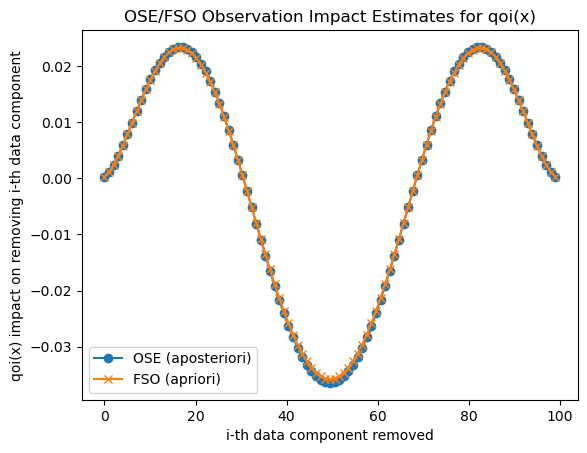

/var/folders/j4/fc2yy05n3_v93dhk228gby9h0000gn/T/ipykernel_84456/3223410202.py:214: RuntimeWarning: invalid value encountered in divide
  plt.plot(x_axis, ((fsox - osex) / (osex))[1:-1], marker='o')


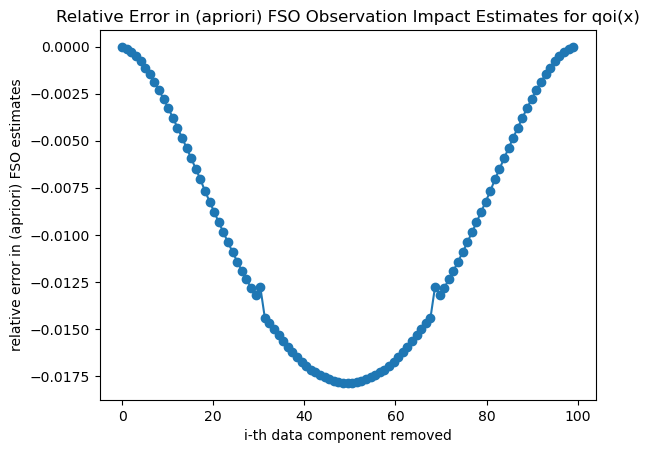

In [65]:
(osex, oseu, fsox, fsou) = homework5(0, 25.0)
plotspart1(osex, oseu, fsox, fsou)

#### Part 2

Here we are interested in apriori estimation of the impact of data removal on the optimal parameter value $u^*$. Consider the quantitiy of interest specified in terms of the parameter $u^*$ as 
$$
Q(u) = \frac{1}{2} |u-u^*|^2
\tag{20}
$$

The impact on the optimal parameter estimate produced by removing any individual data component $y_i, i=1:n$ from the optimization problem (3) can be quantified as 
$$
\Delta Q_i \ \dot{=} \ Q(u_{[i]}^*)-Q(u^*)=\frac{1}{2}|u_{[i]}^*-u^*|^2, i=1:n
\tag{21}
$$

The first thing we need to do is derive teh expression of the FSO-based apriori estimate of the impact of data removal (24).

Now we know $Q(u)=Q(u,\mathbf{s})=Q(u(\mathbf{s}))=\tilde{Q}(\mathbf{s})$.

Doin a second-order Taylor expansion about $\bar{\mathbf{s}}$ we get
$$
\tilde{Q}(\mathbf{s}_{[i]})-\tilde{Q}(\mathbf{\bar{s}}) \approx \delta \tilde{Q}_{[i]} \ \dot{=} \ (\mathbf{s}_{[i]}-\mathbf{\bar{s}})^T \nabla_{\mathbf{s}}\tilde{Q}(\mathbf{\bar{s}}) + \frac{1}{2} (\mathbf{s}_{[i]}-\mathbf{\bar{s}})^T \nabla_{\mathbf{s}\mathbf{s}}^2\tilde{Q}(\mathbf{\bar{s}})(\mathbf{s}_{[i]}-\mathbf{\bar{s}})
\tag{22}
$$

Now we know,
$$
Q(u(\mathbf{s}))=\frac{1}{2}|u(\mathbf{s})-u^*|^2
\tag{23}
$$

Therfore, 
$$
Q(u(\mathbf{\bar{s}}))=\frac{1}{2}|u(\mathbf{\bar{s}})-u^*|^2=\frac{1}{2}|u^*-u^*|^2=0
\tag{24}
$$

Also, 
$$
\nabla_{\mathbf{s}}Q(u(\mathbf{s}))=\nabla_{\mathbf{s}}u\nabla_u Q = \nabla_{\mathbf{s}}u(u(\mathbf{s})-u^*)
\tag{25}
$$

Therefore, 
$$
\nabla_{\mathbf{s}}Q(u(\mathbf{\bar{s}}))=\nabla_{\mathbf{s}}u(u(\mathbf{\bar{s}})-u^*) = \nabla_{\mathbf{s}}u(u^*-u^*)=0
\tag{26}
$$

Thus, combinging what we know from (22)(24)(26) we get
$$
\tilde{Q}(\mathbf{s}_{[i]}) - 0 \approx \delta\tilde{Q}_i \ \dot{=} \  0 + \frac{1}{2} (\mathbf{s}_{[i]}-\mathbf{\bar{s}})^T \nabla_{\mathbf{s}\mathbf{s}}^2\tilde{Q}(\mathbf{\bar{s}})(\mathbf{s}_{[i]}-\mathbf{\bar{s}})
\tag{27} = \frac{1}{2} (\mathbf{s}_{[i]}-\mathbf{\bar{s}})^T \nabla_{\mathbf{s}\mathbf{s}}^2\tilde{Q}(\mathbf{\bar{s}})(\mathbf{s}_{[i]}-\mathbf{\bar{s}}) = \frac{1}{2}\biggl[ \nabla_{\mathbf{s}\mathbf{s}}^2 \tilde{Q}(\mathbf{\bar{s}})\biggr]_{ii}
$$

Therefore, we need to figure out what $\biggl[ \nabla_{\mathbf{s}\mathbf{s}}^2 \tilde{Q}(\mathbf{\bar{s}})\biggr]$ is.

We know 
$$
\nabla_{\mathbf{s}}\tilde{Q}(\mathbf{s})= \nabla_{\mathbf{s}}Q(u(\mathbf{s}))=\nabla_{\mathbf{s}}u(u(\mathbf{s})-u^*)
\tag{28}
$$
Therefore,
$$
\nabla_{\mathbf{s}}(\nabla_{\mathbf{s}}\tilde{Q}(\mathbf{s}))= \nabla_{\mathbf{s}\mathbf{s}}^2u(u(\mathbf{s})-u^*)+ [\nabla_{\mathbf{s}}u][\nabla_{\mathbf{s}}u]^T
\tag{29}
$$

Thus,
$$
\nabla_{\mathbf{s}\mathbf{s}}^2\tilde{Q}(\mathbf{\bar{s}})=\frac{1}{2}\nabla_{\mathbf{s}\mathbf{s}}^2u(u(\mathbf{\bar{s}})-u^*)+ [\nabla_{\mathbf{s}}u]_{\mathbf{\bar{s}}}^T[\nabla_{\mathbf{s}}u]_{\mathbf{\bar{s}}}=\frac{1}{2}\nabla_{\mathbf{s}\mathbf{s}}^2u(u^*-u^*)+ [\nabla_{\mathbf{s}}u]_{\mathbf{\bar{s}}}[\nabla_{\mathbf{s}}u]_{\mathbf{\bar{s}}}^T=\frac{1}{2}[\nabla_{\mathbf{s}}u]_{\mathbf{\bar{s}}}[\nabla_{\mathbf{s}}u]_{\mathbf{\bar{s}}}^T \in \mathbb{R}^{n \times n}
\tag{30}
$$

We note that we know from Part 1 equation (17) that:
$$
[\nabla_{\mathbf{s}}u]_{\mathbf{\bar{s}}}=-h(\mathbf{x}^*-\mathbf{y})\odot \biggl[\frac{\partial \mathbf{x}}{\partial u}\biggr]_{\mathbf{x}^*,u^*}[\nabla_{uu}^2 \tilde{J}(u^*, \mathbf{\bar{s}})]^{-1} \in \mathbb{R}^n
\tag{31}
$$

Furthermore, included are plots of the aposteriori observation impacts evaluated from OSEs and the apriori FSO-based estimates, and the relative error in the apriori estimates given the qoi based on $u^*$.

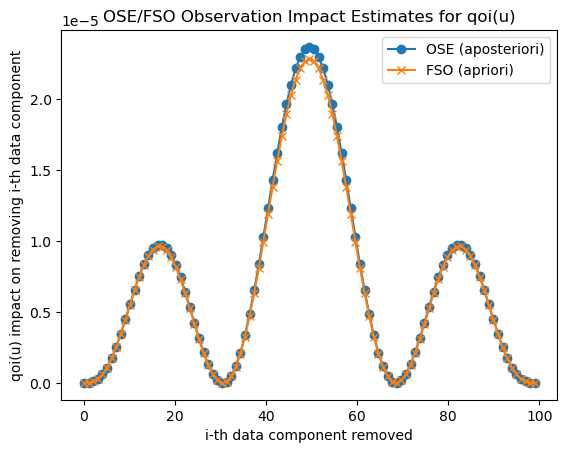

/var/folders/j4/fc2yy05n3_v93dhk228gby9h0000gn/T/ipykernel_84456/3223410202.py:233: RuntimeWarning: invalid value encountered in divide
  plt.plot(x_axis, ((fsou - oseu) / (oseu))[1:-1], marker='o')


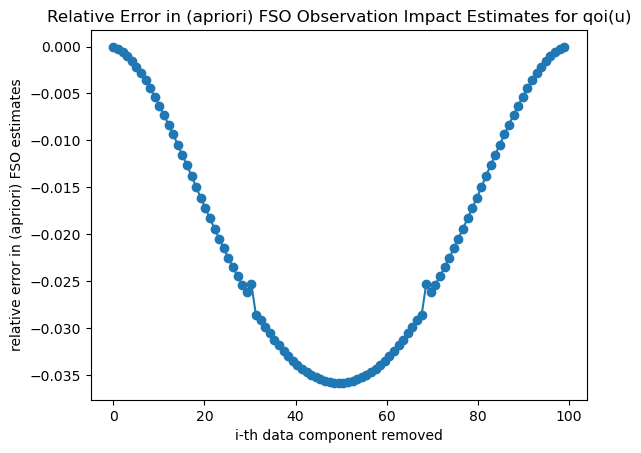

In [66]:
plotspart2(osex, oseu, fsox, fsou)